#### IMPORT BASIC PYTHON LIBRARIES

In [83]:
import csv
import numpy as np # for numerical computing
import pandas as pd # for loading the data set and carrying out vital analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

#### LOAD THE DATA SET

In [84]:
df = pd.read_csv('used_cars_data-1.csv')

#### EXPLORATORY DATA ANALYSIS

In [85]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [86]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [87]:
df.shape

(7253, 14)

In [88]:
df.duplicated().sum()

0

In [89]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [91]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

#### FILLING THE EMPTY ROWS

- The extracted String values are  converted to floating-point numbers and replaced in the replaced in their respective columns


In [92]:

df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+)').astype(float) # original value has decimal places
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float) # original value is a whole number
df['Power'] = df['Power'].str.extract('(\d+)').astype(float)  # original value is a whole number

- The rows with missing item are replaced with the median value

In [93]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)

In [94]:


# Identify the rows with missing values in 'Price' column
missing_price_rows = df[df['Price'].isnull()]

# Drop the identified rows and corresponding rows in all other columns
df.drop(index=missing_price_rows.index, inplace=True)

# Display the updated DataFrame
print(df)

# Optional: Save the updated DataFrame to a new CSV file
df.to_csv('used_cars_cleaned_data.csv', index=False)


      S.No.                              Name    Location  Year  \
0         0            Maruti Wagon R LXI CNG      Mumbai  2010   
1         1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                      Honda Jazz V     Chennai  2011   
3         3                 Maruti Ertiga VDI     Chennai  2012   
4         4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                               ...         ...   ...   
6014   6014                  Maruti Swift VDI       Delhi  2014   
6015   6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016   6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017   6017                Maruti Wagon R VXI     Kolkata  2013   
6018   6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 72000       CNG       Manual      First    26.60   998.0   
1                 41000    Diesel      

In [95]:
new_df = pd.read_csv('used_cars_cleaned_data.csv')

In [96]:
new_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.0,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.0,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.0,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,7.88,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,8.23,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,11.67,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.0,5.0,5.51,2.65


#### Univariate Analysis for Price

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

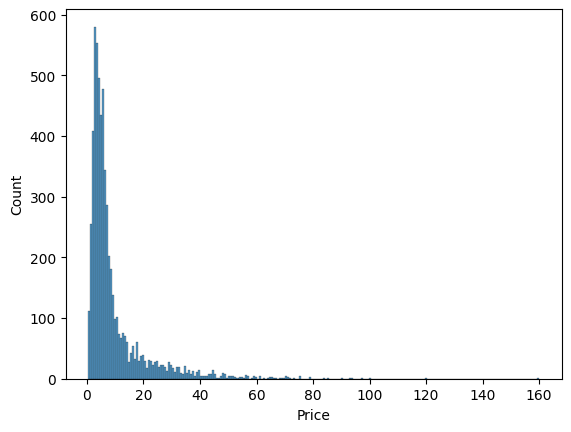

In [97]:
sns.histplot(data=df, x='Price')

- The plot is not normally distributed: It is skewwed to the right:
- There is need to carry out transformation of the Price using log function

In [98]:
new_df['log_Price']= np.log(df['Price'])

In [99]:
new_df['log_Price']

0       0.559616
1       2.525729
2       1.504077
3       1.791759
4       2.875822
          ...   
6014    1.558145
6015    1.386294
6016    1.064711
6017    0.974560
6018    0.916291
Name: log_Price, Length: 6019, dtype: float64

In [100]:
new_df.info() # checking to confirm if missing rows have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
 14  log_Price          6019 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 705.5+ KB


#### Univeraite Analysis of other the Numerical Variables

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Seats', ylabel='Count'>

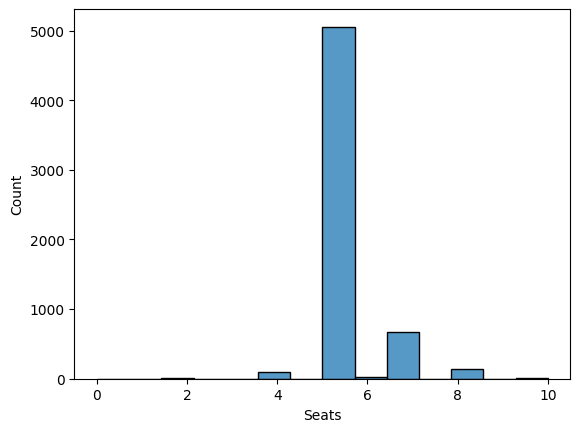

In [101]:
sns.histplot(data=new_df, x='Seats')

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

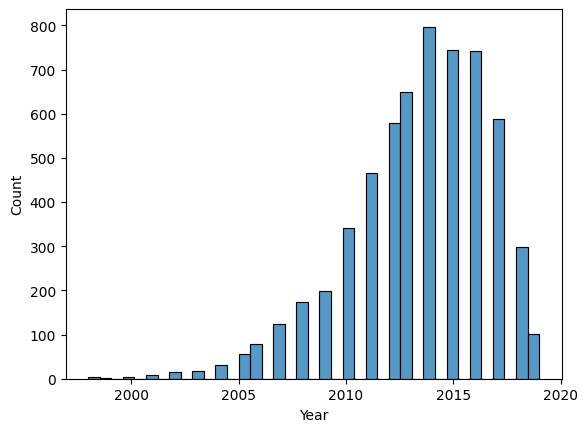

In [102]:
sns.histplot(data=new_df, x='Year')

In [103]:
# Not normally distributed and needs to be converted
new_df['log_Year']= np.log(df['Year'])

In [104]:
new_df['log_Year']

0       7.605890
1       7.608374
2       7.606387
3       7.606885
4       7.607381
          ...   
6014    7.607878
6015    7.608374
6016    7.606885
6017    7.607381
6018    7.606387
Name: log_Year, Length: 6019, dtype: float64

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='New_Price', ylabel='Count'>

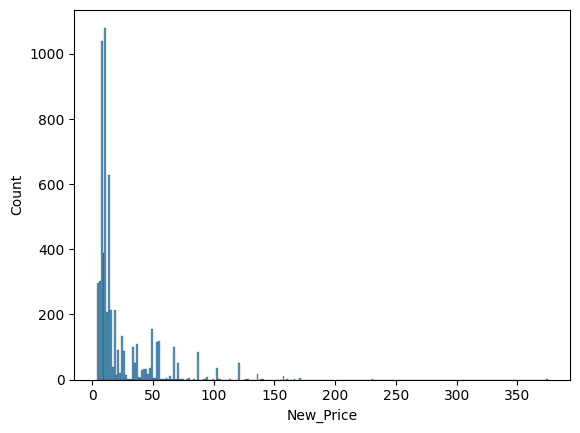

In [105]:
sns.histplot(data=new_df, x='New_Price')

In [106]:
# Not normally distributed and needs to be converted
new_df['log_New_Price']= np.log(df['New_Price'])

In [107]:
new_df['log_New_Price']

0       1.706565
1       2.776332
2       2.152924
3       2.422144
4       3.972930
          ...   
6014    2.064328
6015    2.107786
6016    2.457021
6017    1.706565
6018    2.424803
Name: log_New_Price, Length: 6019, dtype: float64

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

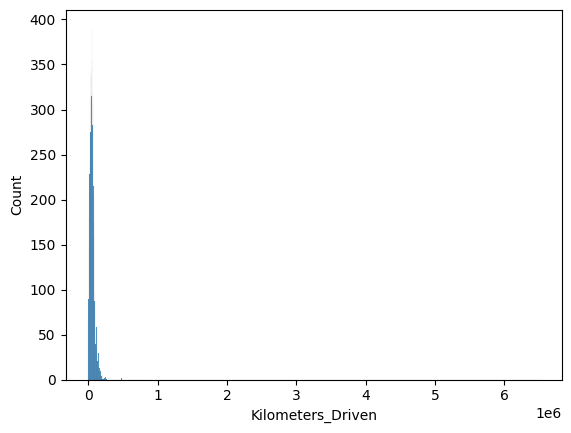

In [108]:
sns.histplot(data=new_df, x='Kilometers_Driven')

In [109]:
# Not normally distributed and needs to be converted
new_df['log_Kilometers_Driven']= np.log(df['Kilometers_Driven'])

In [110]:
new_df['log_Kilometers_Driven']

0       11.184421
1       10.621327
2       10.736397
3       11.373663
4       10.613246
          ...    
6014    10.217020
6015    11.512925
6016    10.915088
6017    10.736397
6018    10.757903
Name: log_Kilometers_Driven, Length: 6019, dtype: float64

C:\Users\user\Documents\Python Scripts\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='S.No.', ylabel='Count'>

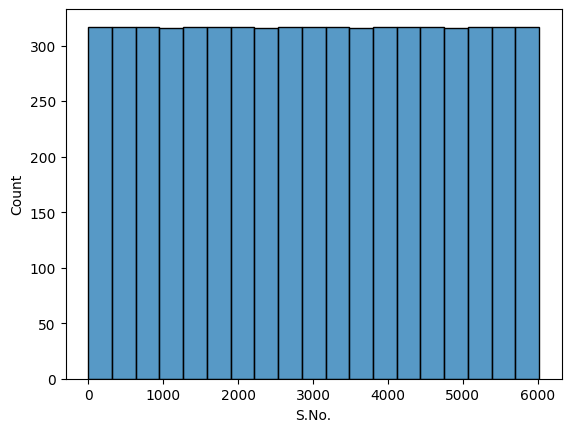

In [111]:
sns.histplot(data=new_df, x='S.No.')

In [112]:
new_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_Price,log_Year,log_New_Price,log_Kilometers_Driven
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.0,5.0,5.51,1.75,0.559616,7.605890,1.706565,11.184421
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.0,5.0,16.06,12.50,2.525729,7.608374,2.776332,10.621327
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.0,5.0,8.61,4.50,1.504077,7.606387,2.152924,10.736397
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,11.27,6.00,1.791759,7.606885,2.422144,11.373663
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,53.14,17.74,2.875822,7.607381,3.972930,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,7.88,4.75,1.558145,7.607878,2.064328,10.217020
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,8.23,4.00,1.386294,7.608374,2.107786,11.512925
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,11.67,2.90,1.064711,7.606885,2.457021,10.915088
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.0,5.0,5.51,2.65,0.974560,7.607381,1.706565,10.736397


In [113]:
new_df_num =new_df.drop (['Price', 'New_Price', 'Kilometers_Driven', 'S.No.','Year'], axis =1)
y = df['Price']

In [114]:
new_df_num

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_Price,log_Year,log_New_Price,log_Kilometers_Driven
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.60,998.0,58.0,5.0,0.559616,7.605890,1.706565,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67,1582.0,126.0,5.0,2.525729,7.608374,2.776332,10.621327
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.20,1199.0,88.0,5.0,1.504077,7.606387,2.152924,10.736397
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77,1248.0,88.0,7.0,1.791759,7.606885,2.422144,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,2.875822,7.607381,3.972930,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First,28.40,1248.0,74.0,5.0,1.558145,7.607878,2.064328,10.217020
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First,24.40,1120.0,71.0,5.0,1.386294,7.608374,2.107786,11.512925
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,1.064711,7.606885,2.457021,10.915088
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First,18.90,998.0,67.0,5.0,0.974560,7.607381,1.706565,10.736397


In [115]:
new_df_num1 = new_df_num.select_dtypes(include = 'number')

In [116]:
new_df_num1

,Mileage,Engine,Power,Seats,log_Price,log_Year,log_New_Price,log_Kilometers_Driven
0,26.60,998.0,58.0,5.0,0.559616,7.605890,1.706565,11.184421
1,19.67,1582.0,126.0,5.0,2.525729,7.608374,2.776332,10.621327
2,18.20,1199.0,88.0,5.0,1.504077,7.606387,2.152924,10.736397
3,20.77,1248.0,88.0,7.0,1.791759,7.606885,2.422144,11.373663
4,15.20,1968.0,140.0,5.0,2.875822,7.607381,3.972930,10.613246
...,...,...,...,...,...,...,...,...
6014,28.40,1248.0,74.0,5.0,1.558145,7.607878,2.064328,10.217020
6015,24.40,1120.0,71.0,5.0,1.386294,7.608374,2.107786,11.512925
6016,14.00,2498.0,112.0,8.0,1.064711,7.606885,2.457021,10.915088
6017,18.90,998.0,67.0,5.0,0.974560,7.607381,1.706565,10.736397


##### Analysing for correlation of the numerical feutiures to tackle collinearity

In [117]:

new_df_num1_corr = new_df_num1.corr()

In [118]:
new_df_num1_corr

,Mileage,Engine,Power,Seats,log_Price,log_Year,log_New_Price,log_Kilometers_Driven
Mileage,1.000000,-0.586405,-0.495945,-0.299632,-0.255092,0.321615,-0.480250,-0.134057
Engine,-0.586405,1.000000,0.860729,0.393368,0.684174,-0.050033,0.795692,0.148218
Power,-0.495945,0.860729,1.000000,0.103297,0.757616,0.025557,0.837196,0.013050
Seats,-0.299632,0.393368,0.103297,1.000000,0.164220,0.015191,0.152169,0.189545
log_Price,-0.255092,0.684174,0.757616,0.164220,1.000000,0.505013,0.783191,-0.204300
log_Year,0.321615,-0.050033,0.025557,0.015191,0.505013,1.000000,0.006020,-0.497749
log_New_Price,-0.480250,0.795692,0.837196,0.152169,0.783191,0.006020,1.000000,0.064704
log_Kilometers_Driven,-0.134057,0.148218,0.013050,0.189545,-0.204300,-0.497749,0.064704,1.000000


- Engine and power are corelated: pwer will be dropped:
- log_Price will be dropped
- log  New_Price has strong corelation with pwer and Engine log new price will be dropped.

<Axes: >

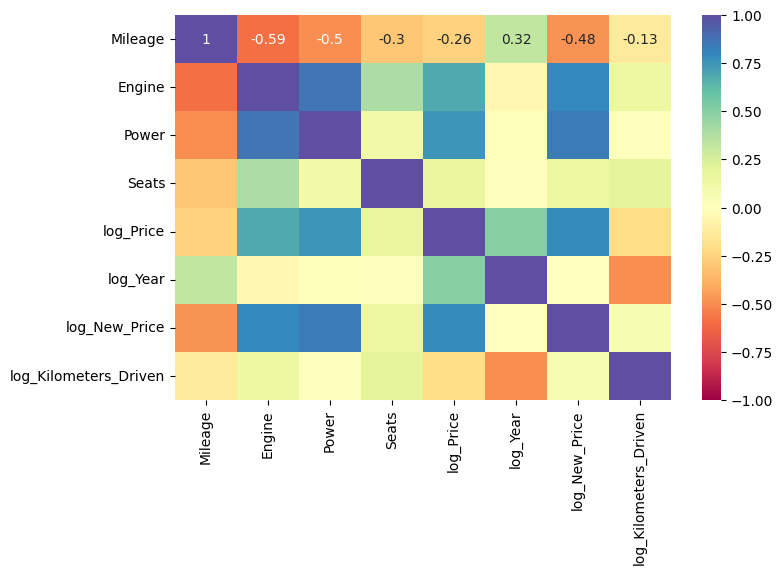

In [119]:
plt.figure(figsize = (8, 5))
sns.heatmap(new_df_num1_corr, vmin=-1, vmax=1, cmap='Spectral', annot=True)


#### Numerical feutures selections

In [122]:
new_df_num2 =new_df_num1.drop (['Power', 'log_Price', 'log_New_Price'], axis =1)
y = df['Price']

In [123]:
new_df_num2

,Mileage,Engine,Seats,log_Year,log_Kilometers_Driven
0,26.60,998.0,5.0,7.605890,11.184421
1,19.67,1582.0,5.0,7.608374,10.621327
2,18.20,1199.0,5.0,7.606387,10.736397
3,20.77,1248.0,7.0,7.606885,11.373663
4,15.20,1968.0,5.0,7.607381,10.613246
...,...,...,...,...,...
6014,28.40,1248.0,5.0,7.607878,10.217020
6015,24.40,1120.0,5.0,7.608374,11.512925
6016,14.00,2498.0,8.0,7.606885,10.915088
6017,18.90,998.0,5.0,7.607381,10.736397


In [124]:
new_df_num2.describe()

,Mileage,Engine,Seats,log_Year,log_Kilometers_Driven
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,18.134969,1620.509221,5.276790,7.607558,10.758780
std,4.581528,599.635458,0.806346,0.001625,0.715788
min,0.000000,72.000000,0.000000,7.599902,5.141664
25%,15.170000,1198.000000,5.000000,7.606387,10.434116
50%,18.160000,1493.000000,5.000000,7.607878,10.878047
75%,21.100000,1969.000000,5.000000,7.608871,11.198215
max,33.540000,5998.000000,10.000000,7.610358,15.687313


In [125]:
new_df_num2.head()

,Mileage,Engine,Seats,log_Year,log_Kilometers_Driven
0,26.60,998.0,5.0,7.605890,11.184421
1,19.67,1582.0,5.0,7.608374,10.621327
2,18.20,1199.0,5.0,7.606387,10.736397
3,20.77,1248.0,7.0,7.606885,11.373663
4,15.20,1968.0,5.0,7.607381,10.613246


####  I AM SORRY I HAD TO SUBMIT FROM HERE SIR BECUASE OF THE DEADLINE

KeyError: "['log_Year', 'log_Kilometers_Driven'] not in index"

In [129]:
new_df2

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,log_Year,log_Kilometers_Driven
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,5.51,1.75,7.605890,11.184421
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,16.06,12.50,7.608374,10.621327
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,8.61,4.50,7.606387,10.736397
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,11.27,6.00,7.606885,11.373663
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,53.14,17.74,7.607381,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,5.0,7.88,4.75,7.607878,10.217020
6015,6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,5.0,8.23,4.00,7.608374,11.512925
6016,6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,8.0,11.67,2.90,7.606885,10.915088
6017,6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,5.0,5.51,2.65,7.607381,10.736397


#### ANALYSIS OF CATEGORICAL FEUTURES

In [127]:
new_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_Price,log_Year,log_New_Price,log_Kilometers_Driven
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.0,5.0,5.51,1.75,0.559616,7.605890,1.706565,11.184421
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.0,5.0,16.06,12.50,2.525729,7.608374,2.776332,10.621327
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.0,5.0,8.61,4.50,1.504077,7.606387,2.152924,10.736397
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,11.27,6.00,1.791759,7.606885,2.422144,11.373663
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,53.14,17.74,2.875822,7.607381,3.972930,10.613246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,7.88,4.75,1.558145,7.607878,2.064328,10.217020
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,8.23,4.00,1.386294,7.608374,2.107786,11.512925
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,11.67,2.90,1.064711,7.606885,2.457021,10.915088
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.0,5.0,5.51,2.65,0.974560,7.607381,1.706565,10.736397


In [126]:
new_df_cat= new_df.drop (['Name'], axis =1)
y = df['Price']

NameError: name 'new_df_cat' is not defined

#### Creating dummies columns

In [114]:
categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [99]:
categorical_feutures

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.0,5.0,5.51,1.75,0.559616
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.0,5.0,16.06,12.50,2.525729
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.0,5.0,8.61,4.50,1.504077
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.0,7.0,11.27,6.00,1.791759
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.0,5.0,53.14,17.74,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.0,5.0,13.23,5.80,1.757858
7249,7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.0,5.0,10.15,5.75,1.749200
7250,7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.0,5.0,9.47,3.75,1.321756
7251,7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.0,5.0,10.15,4.25,1.446919


In [96]:
categorical_columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame
print(df_encoded.head())

   S.No.                              Name  Year  Kilometers_Driven  Mileage  \
0      0            Maruti Wagon R LXI CNG  2010              72000    26.60   
1      1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    19.67   
2      2                      Honda Jazz V  2011              46000    18.20   
3      3                 Maruti Ertiga VDI  2012              87000    20.77   
4      4   Audi A4 New 2.0 TDI Multitronic  2013              40670    15.20   

   Engine  Power  Seats  New_Price  Price  ...  Fuel_Type_Diesel  \
0   998.0   58.0    5.0       5.51   1.75  ...             False   
1  1582.0  126.0    5.0      16.06  12.50  ...              True   
2  1199.0   88.0    5.0       8.61   4.50  ...             False   
3  1248.0   88.0    7.0      11.27   6.00  ...              True   
4  1968.0  140.0    5.0      53.14  17.74  ...              True   

   Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0               False          False             Fal

In [100]:
drop_all =  df.drop (['Price', 'New_Price', 'Power', 'S.No.','log_Price', 'Name'], axis =1)

In [103]:
drop_all

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0
...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,5.0
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,5.0
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,5.0
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,5.0


In [105]:
# Assuming drop_all is your DataFrame generated using some operation
new_df = drop_all


In [106]:
new_df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0
...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,5.0
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,5.0
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,5.0
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,5.0


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with the provided data
# Replace 'df' with your actual variable name
# You might need additional preprocessing steps based on your data

# Selecting features
selected_features = ['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Seats']

# Extracting selected features and target variable
X = df[selected_features]
y = df['Price']  # Assuming 'Price' is the target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing Pipeline
numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats']
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Build the Linear Regression Model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 65.54563398810647
R-squared: 0.3280922140424216


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the provided data
# Replace 'df' with your actual variable name
# You might need additional preprocessing steps based on your data

# 1. Data Preprocessing
# For simplicity, assuming all features are numerical. Adjust as needed.
# Handle missing values, convert categorical variables, etc.

# 2. Feature Selection
# Assuming you want to use 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', and 'Seats'
selected_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats']
X = df[selected_features]
y = df['Price']  # Assuming 'Price' is the target variable

# 3. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 63.32725774688068
R-squared: 0.3508327716962445


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Handle missing values (you may need more sophisticated strategies based on your dataset)
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Location'])

# Specify the features (X) and target variable (y)
X = df.drop(['S.No.', 'Name', 'Price'], axis=1)  # Exclude non-numeric and target columns
y = df['Price']  # Target variable

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 48.69884611239807
R-squared: 0.49866631988614474
